### https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

In [7]:
import pandas as pd 
winedf = pd.read_csv('winequality-red.csv',sep=';')
#print(winedf.isnull().sum()) # check for missing data
winedf.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


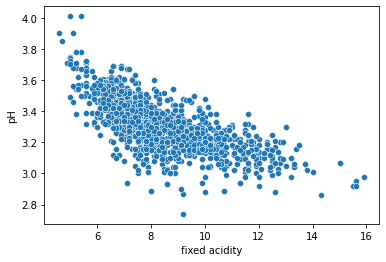

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=winedf['fixed acidity'], y=winedf['pH']);

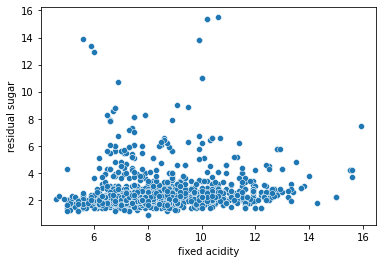

In [9]:
sns.scatterplot(x=winedf['fixed acidity'], y=winedf['residual sugar']);

In [10]:
X=winedf.drop(['quality'],axis=1)
Y=winedf['quality']

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps) # define the pipeline object

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

In [18]:
winedf['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [23]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [24]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [27]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.67
{'SVM__C': 10, 'SVM__gamma': 0.1}
